# HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

### Referência: [Heart Disease Prediction using Logistic Regression](https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

### Data Preparation

In [2]:
heart_df = pd.read_csv("framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head(n=10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
heart_df.shape

(4240, 15)

### Features


1. Demographic: 
    - sex: male or female (Nominal)


2. Behavioural: 
    - currentSmoker: whether or not the patient is a current smoker (Nominal)
    - cigsPerDay: the number of cigarettes that the person smoked on average in one day


3. Medical (history):
    - BPMeds: whether or not the patient was on blood pressure medication (Nominal)
    - prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
    - prevalentHyp: whether or not the patient was hypertensive (Nominal)
    - diabetes: whether or not the patient had diabetes (Nominal)


4. Medical (current):
    - totChol: total cholesterol level (Continuous)
    - sysBP: systolic blood pressure (Continuous)
    - diaBP: diastolic blood pressure (Continuous)
    - BMI: Body Mass Index (Continuous)
    - heartRate: heart rate (Continuous)
    - glucose: glucose level (Continuous)


5. Predict variable (desired target): 
    - TenYearCHD: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
## Verification Missing values
heart_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
count = (heart_df.isnull().sum(axis=1) > 0).sum()

print(f'Total number of rows with missing values is {count}.')
print(f'Since it\'s only {100*count/heart_df.shape[0]:.2f}% of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is 489.
Since it's only 11.53% of the entire dataset the rows with missing values are excluded.


In [6]:
heart_df.dropna(axis=0, inplace=True)

In [7]:
heart_df.head(n=10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [8]:
heart_df.shape

(3751, 15)

### Avaliando o Histograma do Dataset

In [9]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

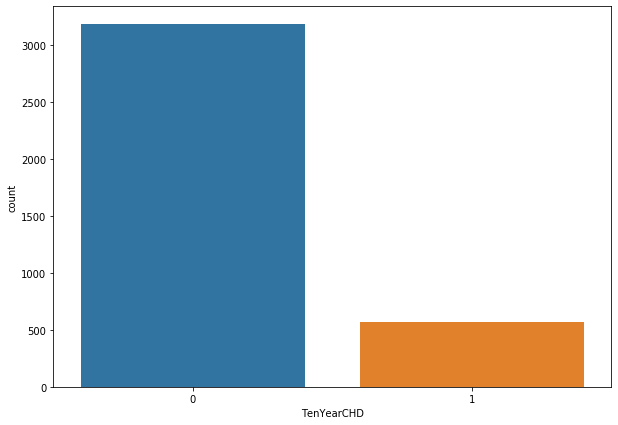

In [10]:
plt.figure(figsize=(10,7))
sn.countplot(x='TenYearCHD', data=heart_df)
plt.show()

In [11]:
heart_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a **categorical** dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for **prediction** and also calculating the **probability** of success.

In [12]:
from statsmodels.tools import add_constant

# Adiciona uma coluna de "uns" aos dados
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

D:\Programs\Miniconda3\envs\qualirede\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
# st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)

cols = heart_df_constant.columns[:-1]
model = sm.Logit(heart_df.TenYearCHD, heart_df_constant[cols])

result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Fri, 01 Nov 2019   Pseudo R-squ.:                  0.1170
Time:                        12:54:47   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
male                0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [14]:
cols

Index(['const', 'male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [15]:
result.params

const             -8.653226
male               0.574177
age                0.064111
currentSmoker      0.073902
cigsPerDay         0.018356
BPMeds             0.144808
prevalentStroke    0.719296
prevalentHyp       0.214190
diabetes           0.002198
totChol            0.002251
sysBP              0.015352
diaBP             -0.003963
BMI                0.010345
heartRate         -0.002281
glucose            0.007579
dtype: float64

In [16]:
teste = result.conf_int()
teste

,0,1
const,-10.000463,-7.305988
male,0.363625,0.784729
age,0.051287,0.076935
currentSmoker,-0.229087,0.376892
cigsPerDay,0.006364,0.030348
BPMeds,-0.310455,0.600070
prevalentStroke,-0.239121,1.677713
prevalentHyp,-0.053075,0.481455
diabetes,-0.609549,0.613944
totChol,0.000131,0.004371


In [17]:
result.pvalues

const              2.435503e-36
male               9.049858e-08
age                1.140790e-22
currentSmoker      6.326103e-01
cigsPerDay         2.698757e-03
BPMeds             5.330109e-01
prevalentStroke    1.413014e-01
prevalentHyp       1.162419e-01
diabetes           9.943821e-01
totChol            3.739862e-02
sysBP              4.465670e-05
diaBP              5.331855e-01
BMI                4.084650e-01
heartRate          5.832903e-01
glucose            6.509821e-04
dtype: float64

### Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [18]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000045       0.000672    0.000175   0.000
male                 1.438535       2.191813    1.775669   0.000
age                  1.052625       1.079972    1.066211   0.000
currentSmoker        0.795259       1.457747    1.076702   0.633
cigsPerDay           1.006384       1.030813    1.018526   0.003
BPMeds               0.733114       1.822247    1.155817   0.533
prevalentStroke      0.787320       5.353300    2.052988   0.141
prevalentHyp         0.948309       1.618428    1.238858   0.116
diabetes             0.543596       1.847705    1.002200   0.994
totChol              1.000131       1.004381    1.002254   0.037
sysBP                1.008012       1.022983    1.015470   0.000
diaBP                0.983708       1.008537    0.996045   0.533
BMI                  0.985916       1.035488    1.010398   0.408
heartRate            0.989624       1.005885    0.997722   0.583
glucose              1.00

### Splitting data to train and test split

In [19]:
import sklearn
new_features=heart_df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]


In [20]:
len(x)

3751

In [21]:
len(y)

3751

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [23]:
x_train.shape

(3000, 6)

In [24]:
x_test.shape

(751, 6)

In [25]:
y_test[:5]

2845    0
1992    1
3312    0
1193    1
2978    0
Name: TenYearCHD, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
#y_pred

D:\Programs\Miniconda3\envs\qualirede\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
###Model Evaluationabs   Model accuracy

In [28]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.881491344873502

In [29]:
# Confusion matrix

array([[658,   1],
       [ 88,   4]], dtype=int64)

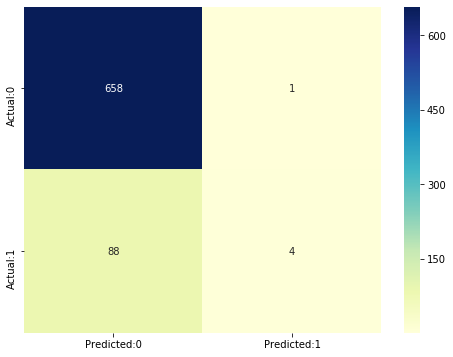

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,6))
ax = sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
cm

#import seaborn as sns
#df_corr = someDataFrame.corr()
#ax = sns.heatmap(df_corr, annot=True) #notation: "annot" not "annote"
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

- True Positives (TP): 4

- True Negatives (TN): 658

- False Positives (FP): 1 (Type I error)

- False Negatives (FN): 88 (Type II error)

In [31]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
TN

658

In [32]:
100 * sensitivity

4.3478260869565215

In [33]:
100 * specificity

99.84825493171472

## Model Evaluation - Statistics

In [34]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.881491344873502 
 The Missclassification = 1-Accuracy =  0.118508655126498 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.043478260869565216 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9984825493171472 
 Positive Predictive value = TP/(TP+FP) =  0.8 
 Negative predictive Value = TN/(TN+FN) =  0.8820375335120644 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  28.65217391304351 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9579754195850403


### Predictions of 0 (No Disease) and 1 (Disease) for the test data with a classification threshold of 0.5

In [35]:
y_pred_prob = logreg.predict_proba(x_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head(n=10)

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.859991,0.140009
1,0.930990,0.069010
2,0.792031,0.207969
3,0.814827,0.185173
4,0.875303,0.124697
5,0.875467,0.124533
6,0.885114,0.114886
7,0.875198,0.124802
8,0.832464,0.167536
9,0.935395,0.064605


### Lower the threshold

Since the model is predicting Heart disease, having too many False Negatives (FN) is not advisable. 

A False Negative (ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

In [36]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[240 419]
 [ 11  81]] 
 with 321 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.8804347826086957 Specificity:  0.36418816388467373 



With 0.2 threshold the Confusion Matrix is  
 [[519 140]
 [ 43  49]] 
 with 568 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.532608695652174 Specificity:  0.787556904400607 



With 0.3 threshold the Confusion Matrix is  
 [[617  42]
 [ 70  22]] 
 with 639 correct predictions and 70 Type II errors( False Negatives) 

 Sensitivity:  0.2391304347826087 Specificity:  0.936267071320182 



With 0.4 threshold the Confusion Matrix is  
 [[652   7]
 [ 86   6]] 
 with 658 correct predictions and 86 Type II errors( False Negatives) 

 Sensitivity:  0.06521739130434782 Specificity:  0.9893778452200304 





## ROC curve

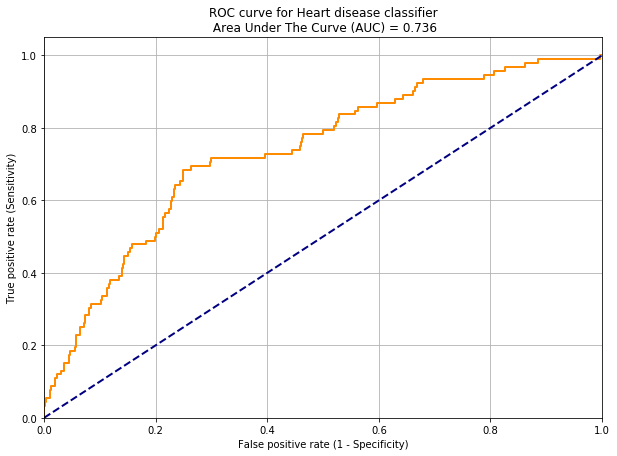

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
auc = sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title(f'ROC curve for Heart disease classifier\n Area Under The Curve (AUC) = {auc:.3f}')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## Precision-Recall Curve

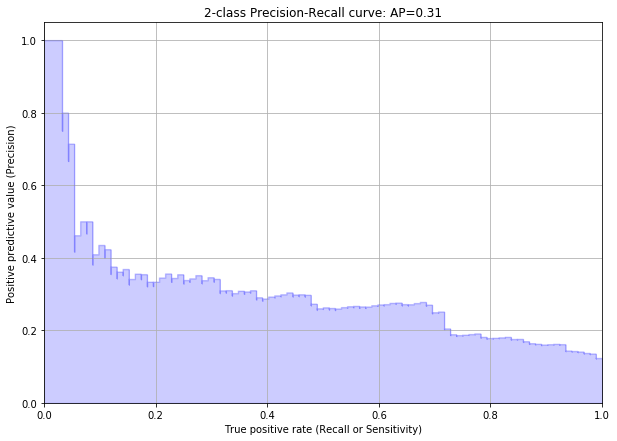

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_yes[:,1])
average_precision = average_precision_score(y_test, y_pred_prob_yes[:,1])


plt.figure(figsize=(10,7))
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
plt.xlabel('True positive rate (Recall or Sensitivity)')
plt.ylabel('Positive predictive value (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.grid(True)